In [13]:
#IMPORT LIBRARIES
import tensorflow as tf

tf.enable_eager_execution()

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

    ##Check that the model will use pydot and graphviz
import pydot
import graphviz
print("pydot and graphviz are installed and working")

pydot and graphviz are installed and working


In [14]:
#GENERATE DATA
np.random.seed(42)
X = np.random.standard_normal((200,1))

print(X)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]
 [-0.23415337]
 [-0.23413696]
 [ 1.57921282]
 [ 0.76743473]
 [-0.46947439]
 [ 0.54256004]
 [-0.46341769]
 [-0.46572975]
 [ 0.24196227]
 [-1.91328024]
 [-1.72491783]
 [-0.56228753]
 [-1.01283112]
 [ 0.31424733]
 [-0.90802408]
 [-1.4123037 ]
 [ 1.46564877]
 [-0.2257763 ]
 [ 0.0675282 ]
 [-1.42474819]
 [-0.54438272]
 [ 0.11092259]
 [-1.15099358]
 [ 0.37569802]
 [-0.60063869]
 [-0.29169375]
 [-0.60170661]
 [ 1.85227818]
 [-0.01349722]
 [-1.05771093]
 [ 0.82254491]
 [-1.22084365]
 [ 0.2088636 ]
 [-1.95967012]
 [-1.32818605]
 [ 0.19686124]
 [ 0.73846658]
 [ 0.17136828]
 [-0.11564828]
 [-0.3011037 ]
 [-1.47852199]
 [-0.71984421]
 [-0.46063877]
 [ 1.05712223]
 [ 0.34361829]
 [-1.76304016]
 [ 0.32408397]
 [-0.38508228]
 [-0.676922  ]
 [ 0.61167629]
 [ 1.03099952]
 [ 0.93128012]
 [-0.83921752]
 [-0.30921238]
 [ 0.33126343]
 [ 0.97554513]
 [-0.47917424]
 [-0.18565898]
 [-1.10633497]
 [-1.19620662]
 [ 0.81252582]
 [ 1.35624003]
 [-0.07201

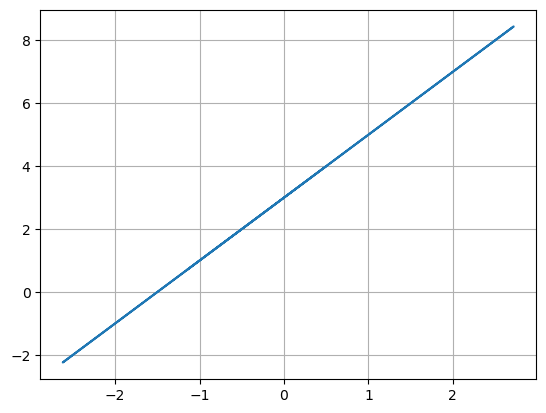

In [15]:
y = 2 * X + 3

    #Create a graph
plt.plot(X,y)

    #Add grid
plt.grid(True)

In [16]:
#CREATE A MODEL
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(1, input_shape=[1])
])

    ##Print the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


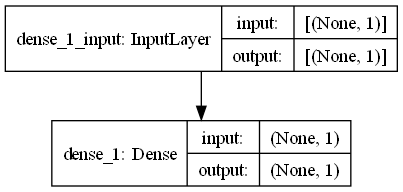

In [17]:
model.compile(loss=tf.keras.losses.mean_squared_error,optimizer=tf.keras.optimizers.Adam())

tf.keras.utils.plot_model(model,show_shapes=True)


In [18]:
#TRAIN THE MODEL
history= model.fit(x=X, y=y, epochs=1000)

Epoch 1/1000
200/200 [==============================] - 0s 466us/sample - loss: 10.4978
Epoch 2/1000
200/200 [==============================] - 0s 40us/sample - loss: 10.4439
Epoch 3/1000
200/200 [==============================] - 0s 30us/sample - loss: 10.3911
Epoch 4/1000
200/200 [==============================] - 0s 37us/sample - loss: 10.3362
Epoch 5/1000
200/200 [==============================] - 0s 43us/sample - loss: 10.2826
Epoch 6/1000
200/200 [==============================] - 0s 35us/sample - loss: 10.2282
Epoch 7/1000
200/200 [==============================] - 0s 36us/sample - loss: 10.1724
Epoch 8/1000
200/200 [==============================] - 0s 38us/sample - loss: 10.1179
Epoch 9/1000
200/200 [==============================] - 0s 45us/sample - loss: 10.0648
Epoch 10/1000
200/200 [==============================] - 0s 33us/sample - loss: 10.0115
Epoch 11/1000
200/200 [==============================] - 0s 30us/sample - loss: 9.9577
Epoch 12/1000
200/200 [==================

In [19]:
y_pred = model.predict(X)
np.c_[y,y_pred]

array([[ 3.99342831,  3.99334478],
       [ 2.7234714 ,  2.72339106],
       [ 4.29537708,  4.29529285],
       [ 6.04605971,  6.04597139],
       [ 2.53169325,  2.53161335],
       [ 2.53172609,  2.53164625],
       [ 6.15842563,  6.15833712],
       [ 4.53486946,  4.53478479],
       [ 2.06105123,  2.06097245],
       [ 4.08512009,  4.08503628],
       [ 2.07316461,  2.07308578],
       [ 2.06854049,  2.06846166],
       [ 3.48392454,  3.48384237],
       [-0.82656049, -0.82663274],
       [-0.44983567, -0.44990873],
       [ 1.87542494,  1.87534654],
       [ 0.97433776,  0.97426152],
       [ 3.62849467,  3.62841225],
       [ 1.18395185,  1.18387496],
       [ 0.1753926 ,  0.17531824],
       [ 5.93129754,  5.93120956],
       [ 2.5484474 ,  2.5483675 ],
       [ 3.13505641,  3.13497496],
       [ 0.15050363,  0.15042925],
       [ 1.91123455,  1.91115594],
       [ 3.22184518,  3.22176361],
       [ 0.69801285,  0.69793701],
       [ 3.75139604,  3.75131321],
       [ 1.79872262,

In [20]:
tf.keras.losses.mean_squared_error(y[:,0],y_pred[:,0])

<tf.Tensor: id=70816, shape=(), dtype=float32, numpy=6.5570185e-09>

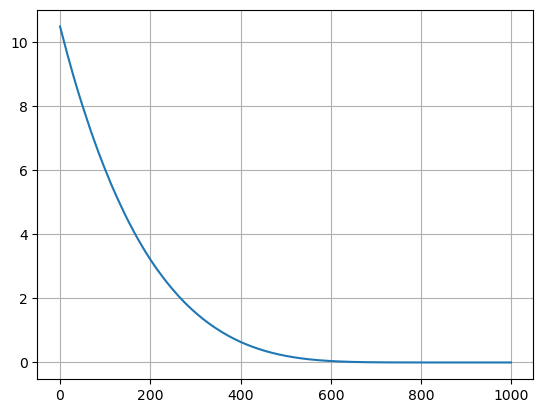

In [21]:
#VISUALIZE THE RESULTS
loss_hist = history.history['loss']
plt.plot(range(1000),loss_hist)
plt.grid(True)

In [22]:
model.layers[0].weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9999954]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([2.999919], dtype=float32)>]